In [1]:
from fastai.vision.all import *
from fastai.metrics import error_rate, accuracy
import timm

In [2]:
dataset = Path('/kaggle/input/imbalanced-reptile-dataset/reptile-dataset')

In [3]:
item_tfms=(Resize(720))
batch_tfms=aug_transforms(size=480, min_scale=0.75)

In [4]:
dls = ImageDataLoaders.from_folder(path=dataset, 
                                   valid_pct=0.2, 
                                   seed=42, 
                                   item_tfms=item_tfms,
                                   batch_tfms=batch_tfms,
                                   bs=16)

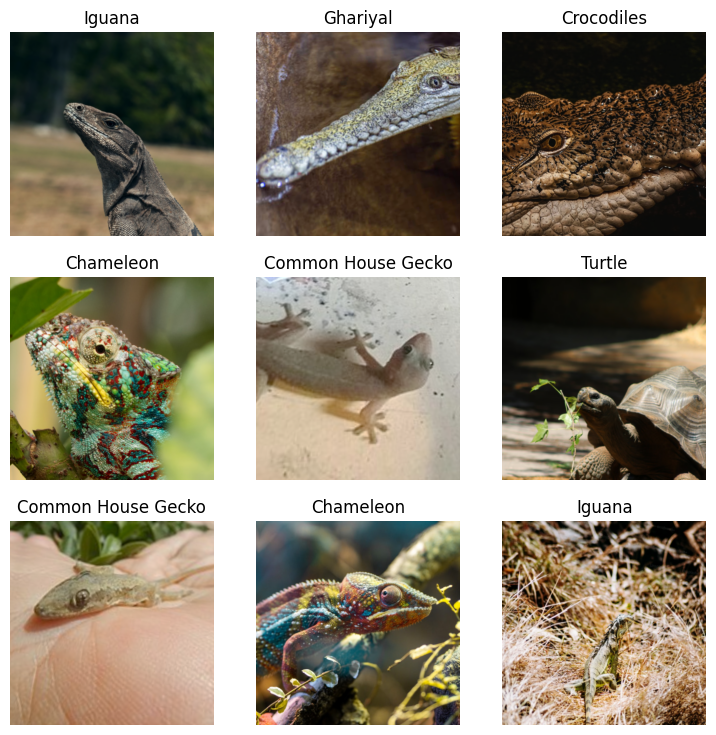

In [5]:
dls.show_batch()

In [6]:
from timm.models import*
all_models1 = timm.list_models('*xception*')
all_models1

['legacy_xception',
 'xception41',
 'xception41p',
 'xception65',
 'xception65p',
 'xception71']

In [7]:
learn = vision_learner(dls, 'xception65', model_dir="/tmp/models",metrics=[accuracy, error_rate]).to_fp16()

model.safetensors:   0%|          | 0.00/160M [00:00<?, ?B/s]

In [8]:
learn = vision_learner(dls, resnet34, model_dir="/tmp/models",metrics=[accuracy, error_rate]).to_fp16()

model.safetensors:   0%|          | 0.00/87.3M [00:00<?, ?B/s]

SuggestedLRs(valley=0.0006918309954926372)

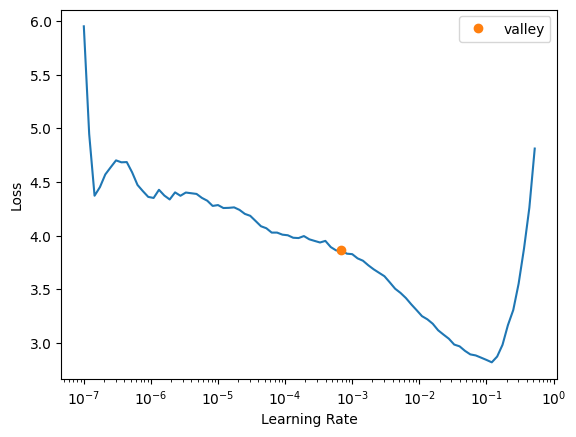

In [9]:
learn.lr_find()

In [23]:
learn.fine_tune(20, 0.1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.900670,12.996890,0.630607,0.369393,00:27


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,3.959269,1.955650,0.831135,0.168865,00:30
1,2.649224,1.634899,0.833773,0.166227,00:30
2,2.469099,5.946681,0.820580,0.179420,00:30
3,2.139135,3.782937,0.762533,0.237467,00:30
4,2.125950,15.138418,0.686016,0.313984,00:30
5,2.477464,54.519352,0.733509,0.266491,00:30
6,2.376569,3.418138,0.786280,0.213720,00:30
7,2.394880,7.285958,0.781003,0.218997,00:30
8,2.387452,7.033319,0.783641,0.216359,00:29
9,1.999287,1.762583,0.786280,0.213720,00:30


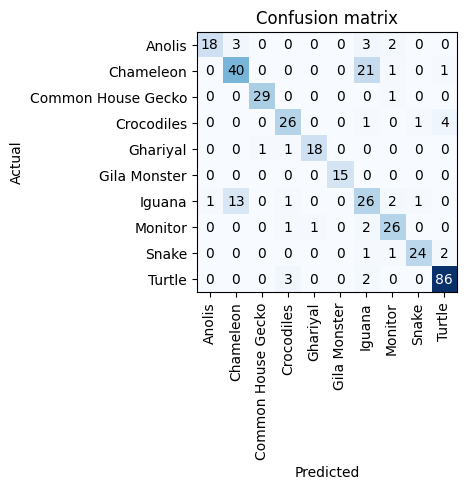

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

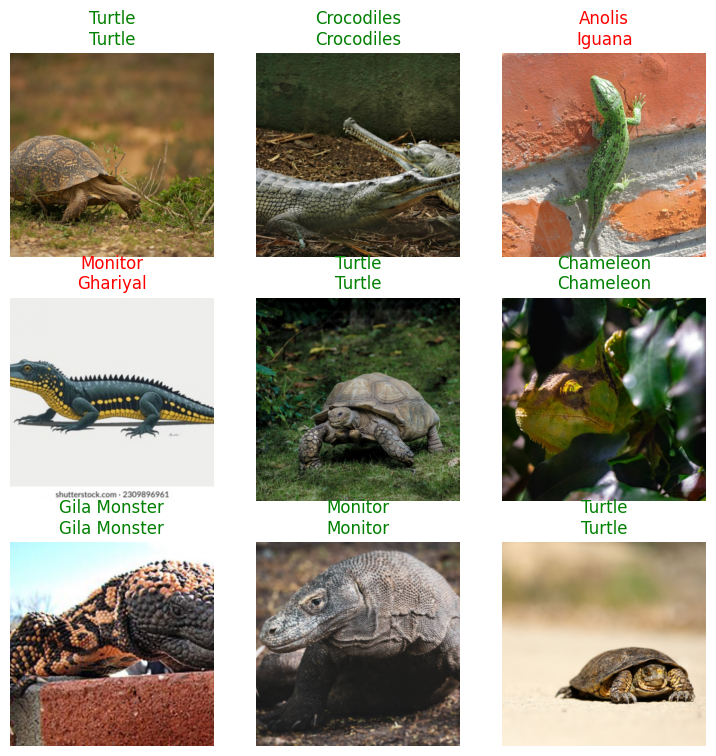

In [12]:
learn.show_results()

In [13]:
learn.save(file='/kaggle/working/reptile_weight_79')

Path('/kaggle/working/reptile_weight_79.pth')

In [14]:
learn.save(file='reptile_weight_79')

Path('/tmp/models/reptile_weight_79.pth')

In [15]:
learn.export('/kaggle/working/export.pkl')

In [16]:
!pwd

/kaggle/working


In [17]:
from fastai.vision.all import load_learner

In [18]:
model = load_learner('/kaggle/working/export.pkl')

In [19]:
print(model)

In [24]:
img = PILImage.create('/kaggle/input/imbalanced-reptile-dataset/reptile-dataset/Crocodiles/croc045.jpg')

In [25]:
prediction = model.predict(img)

In [26]:
print(prediction)

('Crocodiles', tensor(3), tensor([4.0791e-04, 1.8841e-03, 1.9084e-07, 9.9054e-01, 2.8532e-03, 2.4376e-07,
        1.8305e-03, 2.1087e-04, 4.0109e-06, 2.2668e-03]))
